In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
dtrain=pd.read_csv('train.csv')

In [3]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dtrain.Age=dtrain.Age.replace(np.nan,dtrain.Age.median())

In [5]:
len(dtrain[dtrain.Cabin.isna()])/len(dtrain)*100

77.10437710437711

In [6]:
dtrain=dtrain.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

In [7]:
dtrain['Embarked']=dtrain['Embarked'].replace(np.nan,dtrain.Embarked.value_counts().index.max())

In [9]:
dtrain['Sex']=dtrain['Sex'].replace('male',1)
dtrain['Sex']=dtrain['Sex'].replace('female',0)
dtrain['Embarked']=dtrain['Embarked'].replace('S',0)
dtrain['Embarked']=dtrain['Embarked'].replace('C',1)
dtrain['Embarked']=dtrain['Embarked'].replace('Q',2)

In [10]:
dtrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


<AxesSubplot:>

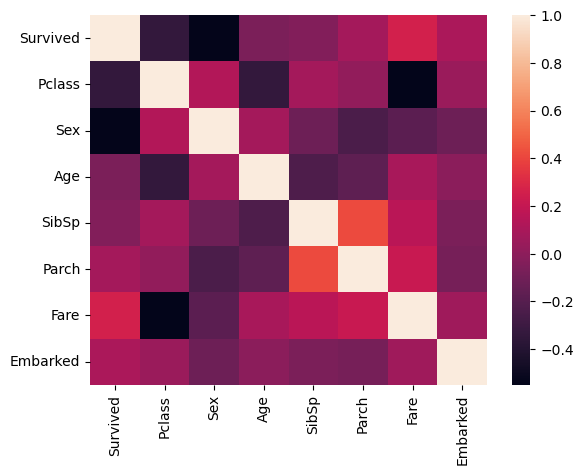

In [11]:
sns.heatmap(dtrain.corr())

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=dtrain.drop(['Survived','Fare'],axis=1)
y=dtrain['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=44)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,0
1,1,0,38.0,1,0,1
2,3,0,26.0,0,0,0
3,1,0,35.0,1,0,0
4,3,1,35.0,0,0,0
...,...,...,...,...,...,...
886,2,1,27.0,0,0,0
887,1,0,19.0,0,0,0
888,3,0,28.0,1,2,0
889,1,1,26.0,0,0,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model=RandomForestClassifier(100,max_depth=3,class_weight='balanced')

In [16]:
model.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3)

In [17]:
model.score(X_train,Y_train)

0.8353293413173652

In [18]:
model.score(X_test,Y_test)

0.7847533632286996

In [19]:
dtest=pd.read_csv('test.csv')

In [20]:
dtest.Age=dtest.Age.replace(np.nan,dtest.Age.median())

In [21]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
id=np.array(dtest.PassengerId)

In [23]:
dtest=dtest.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [24]:
dtest['Sex']=dtest['Sex'].replace('male',1)
dtest['Sex']=dtest['Sex'].replace('female',0)
dtest['Embarked']=dtest['Embarked'].replace('S',0)
dtest['Embarked']=dtest['Embarked'].replace('C',1)
dtest['Embarked']=dtest['Embarked'].replace('Q',2)

In [25]:
dtest

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,2
1,3,0,47.0,1,0,0
2,2,1,62.0,0,0,2
3,3,1,27.0,0,0,0
4,3,0,22.0,1,1,0
...,...,...,...,...,...,...
413,3,1,27.0,0,0,0
414,1,0,39.0,0,0,1
415,3,1,38.5,0,0,0
416,3,1,27.0,0,0,0


In [26]:
per=model.predict(dtest)

In [41]:
pd.DataFrame({'PassengerId':id,'Survived':per}).set_index('PassengerId').to_csv('output.csv')